In [1]:
import NotebookImport
import DX_screen as DX

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from Setup/DX_Imports

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../DX/Notebooks/

/cellar/users/agross/TCGA_Code/DX/Notebooks


In [3]:
from Imports import *
from Preprocessing.ClinicalDataFilters import *

importing IPython notebook from Preprocessing/ClinicalDataFilters

importing IPython notebook from Preprocessing/ClinicalData

PCPG
UCS
MESO


In [4]:
cancers = codes.ix[matched_tn.columns.get_level_values(0)].unique()
pts = matched_tn.columns.get_level_values(0)
cancers_to_use = ti(codes.ix[pts].value_counts() > 15)

#df_inf = {c: infer_normal_knn(rna_df.ix[:, ti(codes == c)], r_curtoff=.3, k=5)
#          for c in cancers_to_use}
#tn_inf_c = pd.concat(df_inf.values(), axis=1)

In [5]:
f = DX.dx_rna.frac
fm = f

In [7]:
fm.shape

(18419,)

In [8]:
store = pd.HDFStore('/data_ssd/RNASeq_2015_02_04.h5')

In [9]:
pts = [p for p in DX.rna_df.columns.get_level_values(0) if 
       (p,'01') in DX.rna_df.columns and (p,'11') in DX.rna_df.columns]
pts = list(set(pts))

In [11]:
mmt = DX.rna_df.xs('11',1,1).ix[:, pts].median(1).ix[fm.index]
sst = DX.rna_df.xs('11',1,1).ix[:, pts].mad(1).ix[fm.index]

mmn = DX.rna_df.xs('01',1,1).ix[:, pts].median(1).ix[fm.index]
ssn = DX.rna_df.xs('01',1,1).ix[:, pts].mad(1).ix[fm.index]

mm = (mmt + mmn) / 2
ss = (sst + ssn) / 2

In [12]:
mm = DX.rna_df.xs('11',1,1).ix[:, pts].mean(1).ix[fm.index]
ss = DX.rna_df.xs('11',1,1).ix[:, pts].std(1).ix[fm.index]

In [13]:
fm.shape

(18419,)

In [14]:
%%time
rna_s = {}
for c in store.keys():
    if c in ['/matched_tn','/codes']:
        continue
    df = store[c].ix[fm.index]
    #most frequent tissue (tumor, normal, ect)
    tissue = pd.value_counts(df.columns.get_level_values(1)).index[0]
    #d2 = df.xs(tissue,1,1)
    #df = df.sub(d2.mean(1), axis=0).div(d2.std(1), axis=0)
    df = df.sub(mm, axis=0).div(ss, axis=0)
    rna_s[c] = df.corrwith(fm - .5)
rna_s = pd.concat(rna_s)
rna_s.index = rna_s.index.droplevel(0)
rna_s = rna_s.groupby(level=[0,1]).first()
rp = rna_s.dropna()

CPU times: user 12 s, sys: 1.99 s, total: 14 s
Wall time: 9.37 s


In [15]:
rp.to_csv('/cellar/users/agross/TCGA_Code/DX/rna_signature.csv')

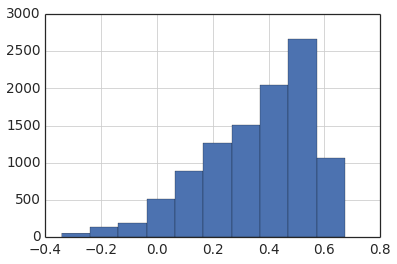

In [16]:
rp.hist()

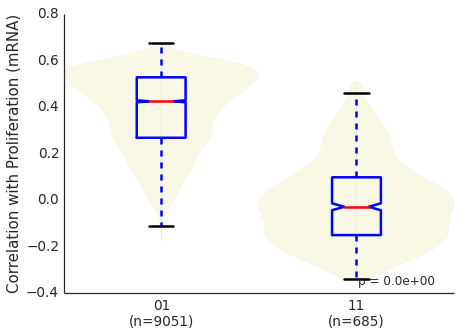

In [17]:
fig, ax = subplots(figsize=(7,5))
violin_plot_series(rp, ax=ax, order=['01','11'])
ax.set_ylabel('Correlation with Proliferation (mRNA)')
ax.set_xlabel('')
prettify_ax(ax)

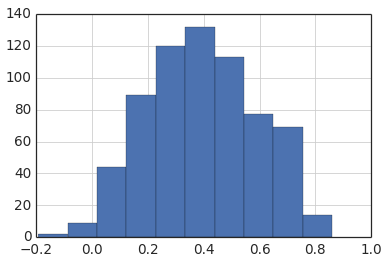

In [18]:
(rp[:, '01'] - rp[:, '11']).hist()

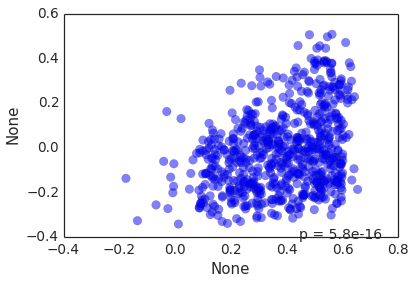

In [19]:
series_scatter(rp[:, '01'], rp[:, '11'])

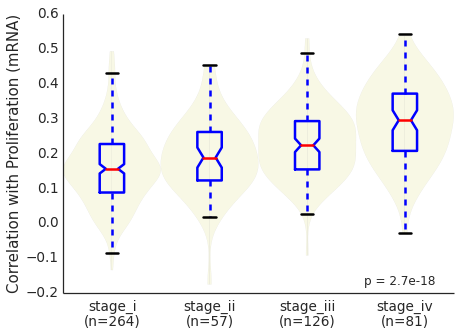

In [20]:
fig, ax = subplots(figsize=(7,5))
violin_plot_pandas(stage.ix[ti(codes=='KIRC')], rp[:,'01'], ax=ax, 
                   order=['stage_i','stage_ii','stage_iii','stage_iv'])
ax.set_ylabel('Correlation with Proliferation (mRNA)')
ax.set_xlabel('')
prettify_ax(ax)

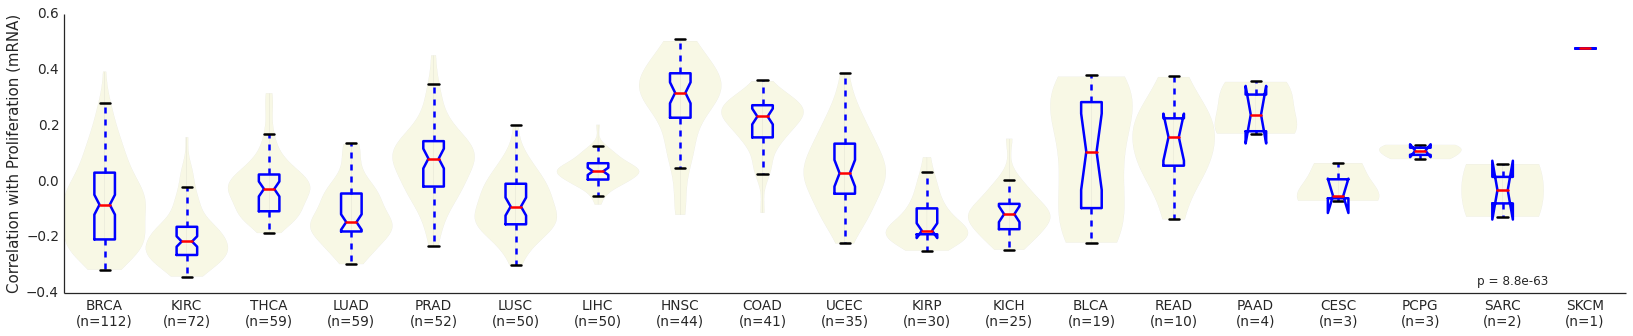

In [21]:
fig, ax = subplots(figsize=(28,5))
violin_plot_pandas(DX.codes, rp[:,'11'], ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Correlation with Proliferation (mRNA)')
prettify_ax(ax)

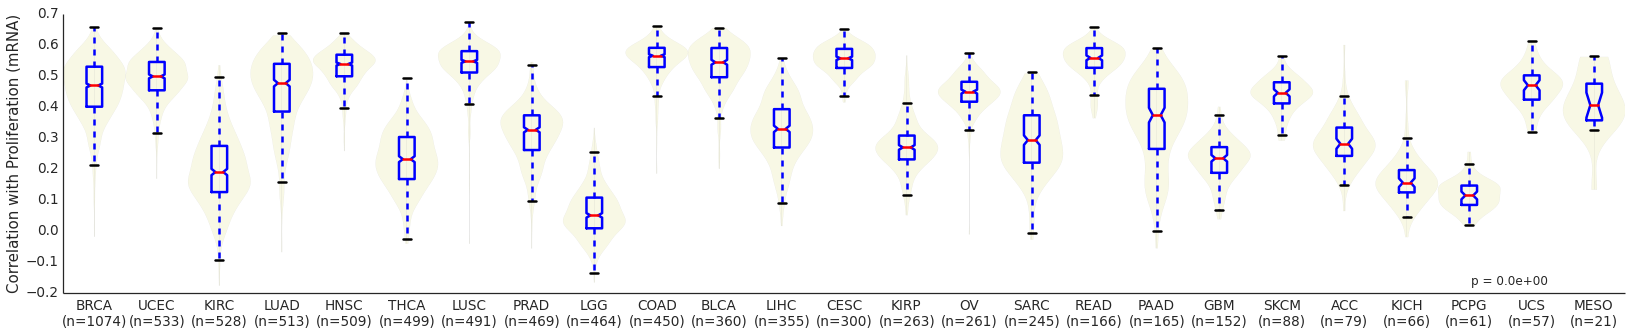

In [230]:
fig, ax = subplots(figsize=(28,5))
violin_plot_pandas(codes, rp[:,'01'], ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Correlation with Proliferation (mRNA)')
prettify_ax(ax)

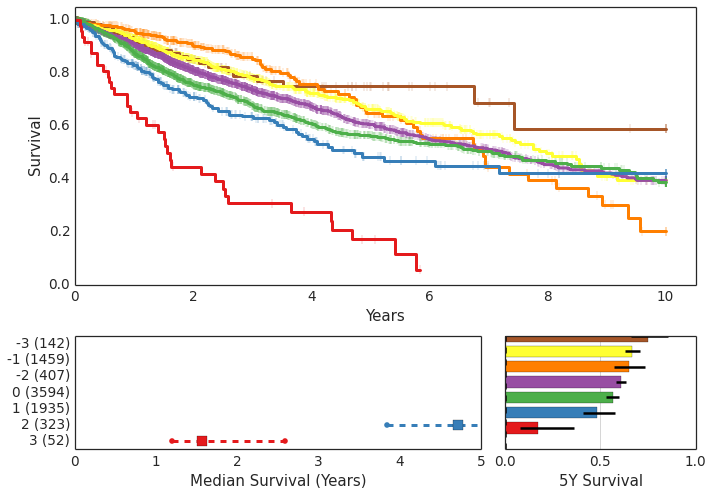

In [23]:
v = rp.ix[:, '01'].dropna()
v = v - codes.map(v.groupby(codes).median())
survival_and_stats(np.round((v - v.mean()) / v.std()).clip(-3,3), surv_10y,
                   figsize=(10,7))

In [57]:
def plot_HR(ci, colors=None, ax=None):
    _, ax = init_ax(ax)
    if colors is None:
        colors = ['grey'] * ci.shape[0]
    ci = np.log2(ci)
    for i,(h,v) in enumerate(ci.iterrows()):
        ax.scatter(v['exp(coef)'], i, marker='s', s=100, color=colors[i], 
                   edgecolors=['black'], zorder=10)
        ax.plot((v['lower .95'],v['upper .95']), (i,i), 
                    lw=3, ls='-', marker='o', dash_joinstyle='bevel', 
                color=colors[i])
    prettify_ax(ax)
    ax.set_ybound(-.5, i + .5)
    ax.set_yticks(range(i+1))
    ax.set_yticklabels(ci.index)
    ax.axvline(0, ls='--', lw=2, color='grey', zorder=-1)
    ax.set_xticklabels(2.**ax.get_xticks())

In [161]:
codes

TCGA-OR-A5J1    ACC
TCGA-OR-A5J2    ACC
TCGA-OR-A5J3    ACC
TCGA-OR-A5J4    ACC
TCGA-OR-A5J5    ACC
TCGA-OR-A5J6    ACC
TCGA-OR-A5J7    ACC
TCGA-OR-A5J8    ACC
TCGA-OR-A5J9    ACC
TCGA-OR-A5JA    ACC
TCGA-OR-A5JB    ACC
TCGA-OR-A5JC    ACC
TCGA-OR-A5JD    ACC
TCGA-OR-A5JE    ACC
TCGA-OR-A5JF    ACC
...
TCGA-UW-A72R    KICH
TCGA-UW-A72S    KICH
TCGA-UW-A72T    KICH
TCGA-UW-A7GC    KICH
TCGA-UW-A7GG    KICH
TCGA-UW-A7GI    KICH
TCGA-UW-A7GJ    KICH
TCGA-UW-A7GK    KICH
TCGA-UW-A7GL    KICH
TCGA-UW-A7GN    KICH
TCGA-UW-A7GP    KICH
TCGA-UW-A7GR    KICH
TCGA-UW-A7GU    KICH
TCGA-UW-A7GX    KICH
TCGA-UW-A7GY    KICH
Name: codes, Length: 10058, dtype: object

In [91]:
f = rp[:, '01'].copy()
f = (f - f.mean()) / f.std()
m = get_cox_ph(surv_5y, f, [codes, stage, old, age], print_desc=False, interactions=False)
ci = convert_robj(robjects.r.summary(m)[7])
pancan_ci = ci.ix['feature']
pancan_ci.name = 'PANCAN'

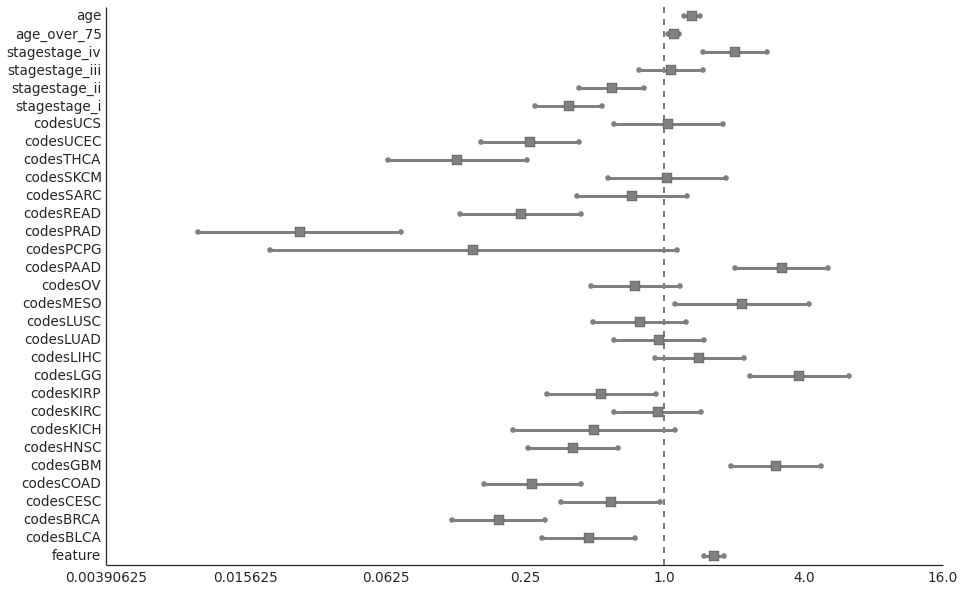

In [92]:
fig, ax = subplots(figsize=(15,10))
plot_HR(ci, ax=ax)

In [101]:
v = rp[:, '01'].dropna()
ci = {}
for c in codes.unique():
    try:
        pts = ti(codes == c)
        f = v.ix[pts].dropna()
        cov = [b.ix[pts].dropna() for b in [stage, old, age] if 
               b.ix[pts].dropna().unique().shape[0] > 1]
        f = (f - f.mean()) / f.std()
        m1 = get_cox_ph(surv_5y, f, covariates=cov, 
                        print_desc=False, interactions=False);
        ci[c] = convert_robj(robjects.r.summary(m1)[7])
    except:
        print c

In [227]:
cc = pd.concat(ci).xs('feature', level=1)
cc = cc.sort('exp(coef)', ascending=False)
cc = cc[(cc['upper .95'] - cc['lower .95']) < 100]

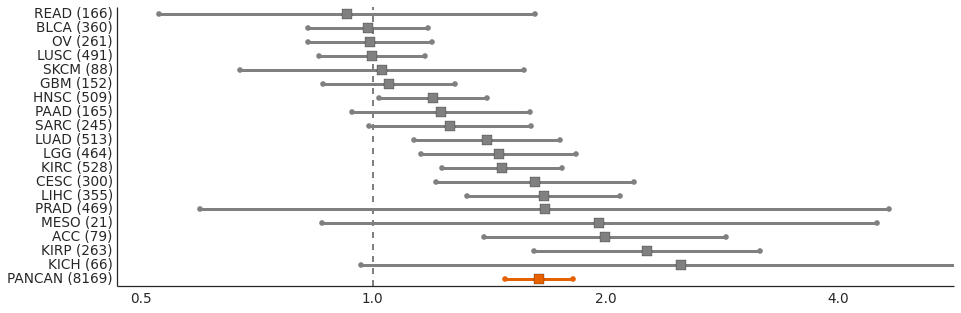

In [228]:
fig, ax = subplots(figsize=(15,5))
c2 = pd.DataFrame([pancan_ci]).append(cc)
colors = ['#E66101'] + (['grey'] * len(cc))
plot_HR(c2, ax=ax, colors=colors)
ax.set_xlim(-1.1, 2.5)
ax.set_xticks([-1,0,1,2])
ax.set_xticklabels(2.**ax.get_xticks())
codes_f = codes.ix[(codes.index.intersection(v.index).intersection(stage.index).
                    intersection(age.index).intersection(old.index))]
label = ['{} ({})'.format(i,c) for i,c in 
         codes_f.value_counts().ix[cc.index].iteritems()]
label = ['PANCAN ({})'.format(len(codes_f))] + label
ax.set_yticklabels(label);

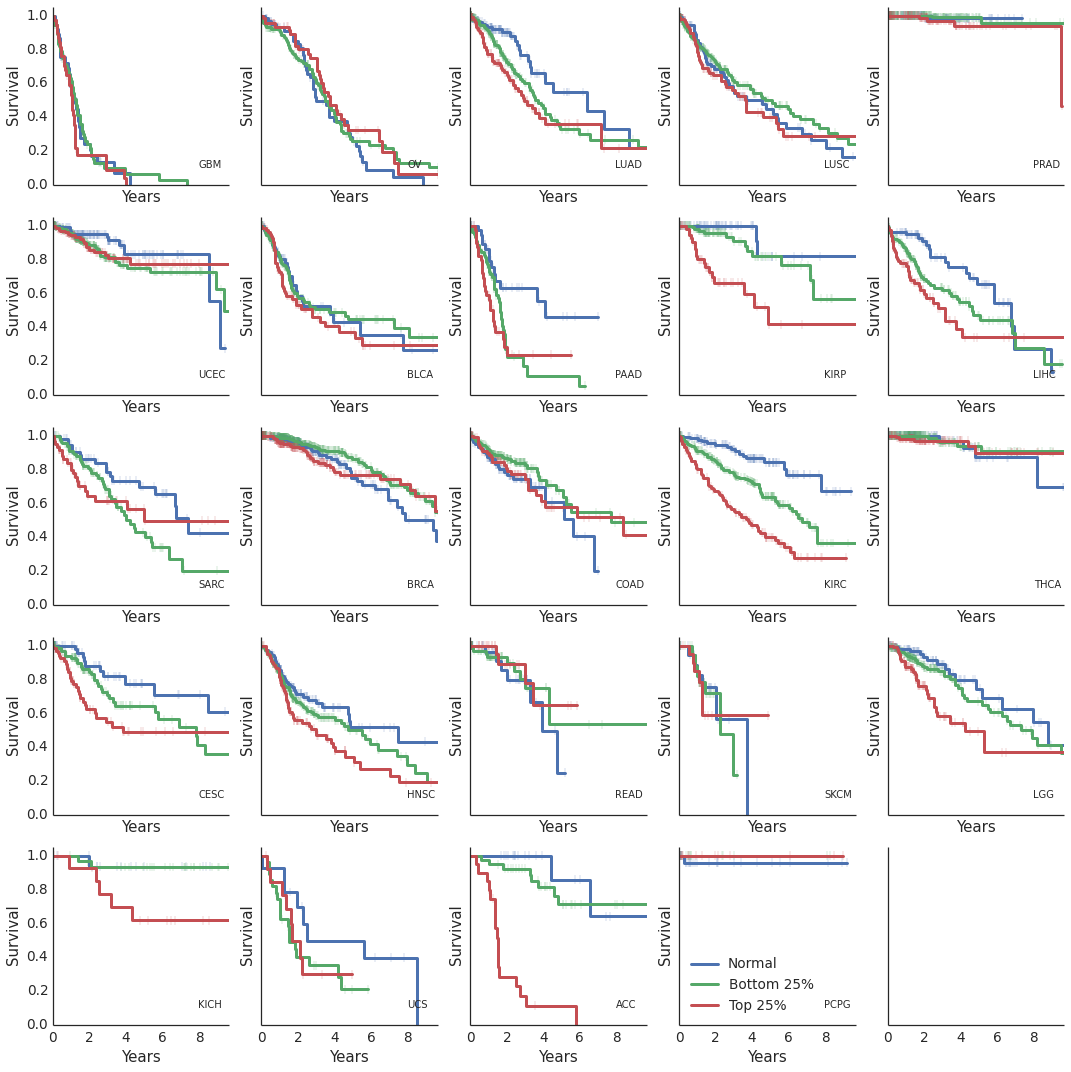

In [202]:
cc = codes.ix[v.index].dropna()
ss = surv_10y.unstack().index
cc = cc[cc.isin(ti(cc.value_counts()  > 30))]
fig, axs = subplots(5,5, figsize=(15,15), sharey=True, sharex=True)
axs = axs.flatten()
for i,c in enumerate(cc.unique()):
    ax = axs[i]
    ax.annotate(c, (8, .1))
    draw_survival_curve(v.ix[ss].ix[ti(cc==c)].dropna(), surv_10y,
                        ax=ax)
    ax.legend_.set_visible(False)
ax.legend_.set_visible(True)
fig.tight_layout()
DX.sns.despine(fig)

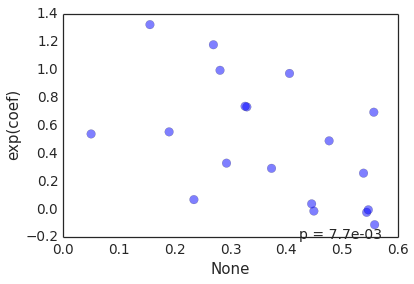

In [220]:
cc = pd.concat(ci).xs('feature', level=1)
cc = cc[(cc['upper .95'] - cc['lower .95']) < 100]
v = rp[:, '01'].dropna()
series_scatter(v.groupby(codes).median(), np.log2(cc['exp(coef)']))

In [213]:
v = rp.ix[:, '01'].dropna()
v = v - codes.map(v.groupby(codes).median())
v = v.dropna()
v.name = 'f'

In [214]:
get_cox_ph_ms(surv_5y, v, [codes, stage, old], interactions=False)

LR                                                    1.86e-23
feature_p                                                    0
fmla         Surv(days, event) ~ feature + codes + stage + ...
hazzard                                                   19.6
dtype: object

In [215]:
get_cox_ph_ms(surv_5y, v, [codes, old], interactions=False)

LR                                                    6.33e-34
feature_p                                                    0
fmla         Surv(days, event) ~ feature + codes + age_over...
hazzard                                                   36.4
dtype: object

In [216]:
get_cox_ph_ms(surv_5y, v.ix[keepers], [codes, stage, old, age], interactions=False)

LR                                                    4.45e-17
feature_p                                             2.22e-16
fmla         Surv(days, event) ~ feature + codes + stage + ...
hazzard                                                   17.5
dtype: object

In [173]:
mut_all = pd.read_csv('/cellar/users/agross/TCGA_Code/TCGA/Data/MAFs_new_2/meta.csv', 
                      index_col=[1,2])
mut = mut_all['0'].unstack().fillna(0)
mut = FH.fix_barcode_columns(mut)
mut = mut.xs('01', axis=1, level=1)
df = 1.*(mut[mut.sum(1) > 15] > 0)

In [174]:
df = 1.*(mut[(mut > 0).sum(1) > 100] > 0)

In [175]:
df.shape

(2479, 6214)

In [176]:
v = rp.ix[:, '01'].dropna()
v = v - DX.codes.map(v.groupby(DX.codes).median())

In [177]:
rr = screen_feature(v, rev_kruskal, df, align=False)

In [179]:
rr.head()

,H,p,q
TP53,101.41,7.49e-24,1.86e-20
BAP1,45.86,1.27e-11,1.57e-08
BRAF,35.36,2.74e-09,2.26e-06
ZFPM2,33.13,8.62e-09,5.34e-06
SORCS1,31.22,2.30e-08,1.14e-05


In [180]:
d2 = mut.ix[:, ti(codes=='KIRC')]>0
d2 = d2[d2.sum(1) > 9]
d2.shape

(239, 532)

In [181]:
rr = screen_feature(v, rev_kruskal, d2, align=False)

In [182]:
rr.head(10)

,H,p,q
BAP1,31.75,1.76e-08,4.20e-06
SETD2,12.42,4.25e-04,5.08e-02
TP53,8.21,4.18e-03,3.10e-01
ZNF717,7.46,6.32e-03,3.10e-01
SYNE1,7.39,6.56e-03,3.10e-01
PTEN,7.00,8.15e-03,3.10e-01
DNHD1,6.81,9.07e-03,3.10e-01
BAZ2B,6.19,1.28e-02,3.59e-01
DYNC2H1,6.04,1.40e-02,3.59e-01
HERC1,5.91,1.50e-02,3.59e-01


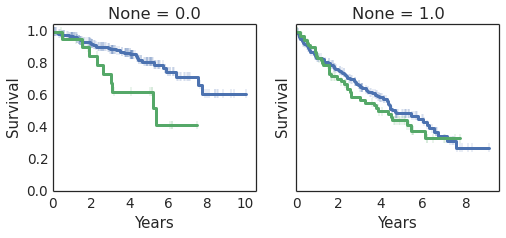

In [190]:
draw_survival_curves(d2.ix[['BAP1','RELN','SETD2','SETD2','CELSR1']].sum()>0, surv, to_quants(v, .5))

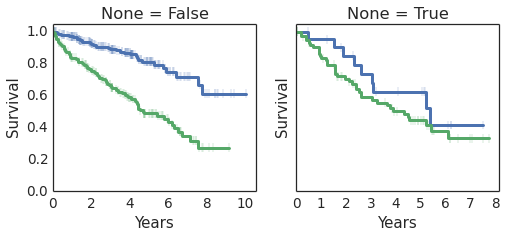

In [191]:
draw_survival_curves(to_quants(v, .5), surv, d2.ix[['BAP1','RELN','SETD2','SETD2','CELSR1']].sum()>0)

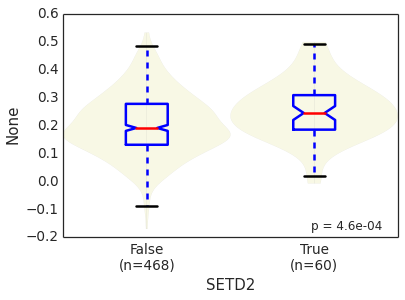

In [192]:
violin_plot_pandas(d2.ix['SETD2'], rp[:, '01'])

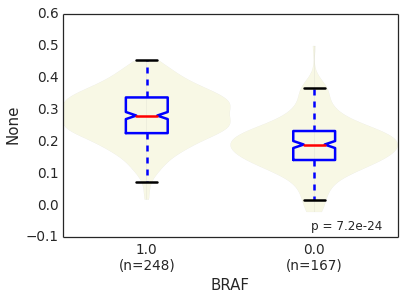

In [193]:
violin_plot_pandas(df.ix['BRAF'].ix[ti(codes=='THCA')], rp[:, '01'])

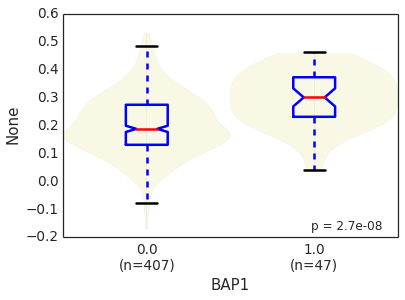

In [194]:
violin_plot_pandas(df.ix['BAP1'].ix[ti(codes=='KIRC')], rp[:, '01'])

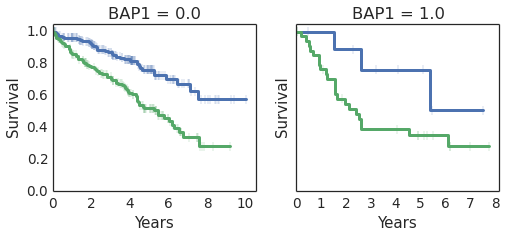

In [141]:
draw_survival_curves(to_quants(v.ix[ti(codes=='KIRC')], q=.5), surv_10y, df.ix['BAP1'])

In [118]:
linear_regression((mut > 0).sum().groupby(codes).mean(),
                  rp[:, '01'].groupby(codes).mean())

intercept    4.18e-01
p-value      6.33e-02
r-value      3.93e-01
slope        4.16e-04
stderr       2.12e-04
dtype: float64

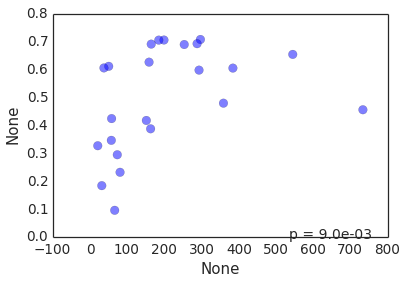

In [119]:
series_scatter((mut > 0).sum().groupby(codes).mean(),
               rp[:, '01'].groupby(codes).mean())

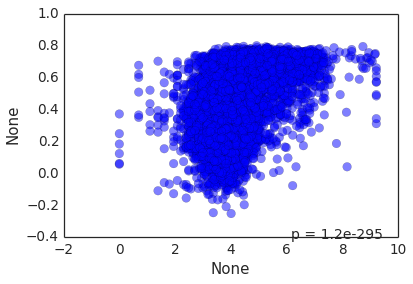

In [98]:
series_scatter(np.log(mut.sum().clip_upper(10000)), rp[:,'01'])

In [22]:
from Figures.Survival import draw_survival_curves_mpl

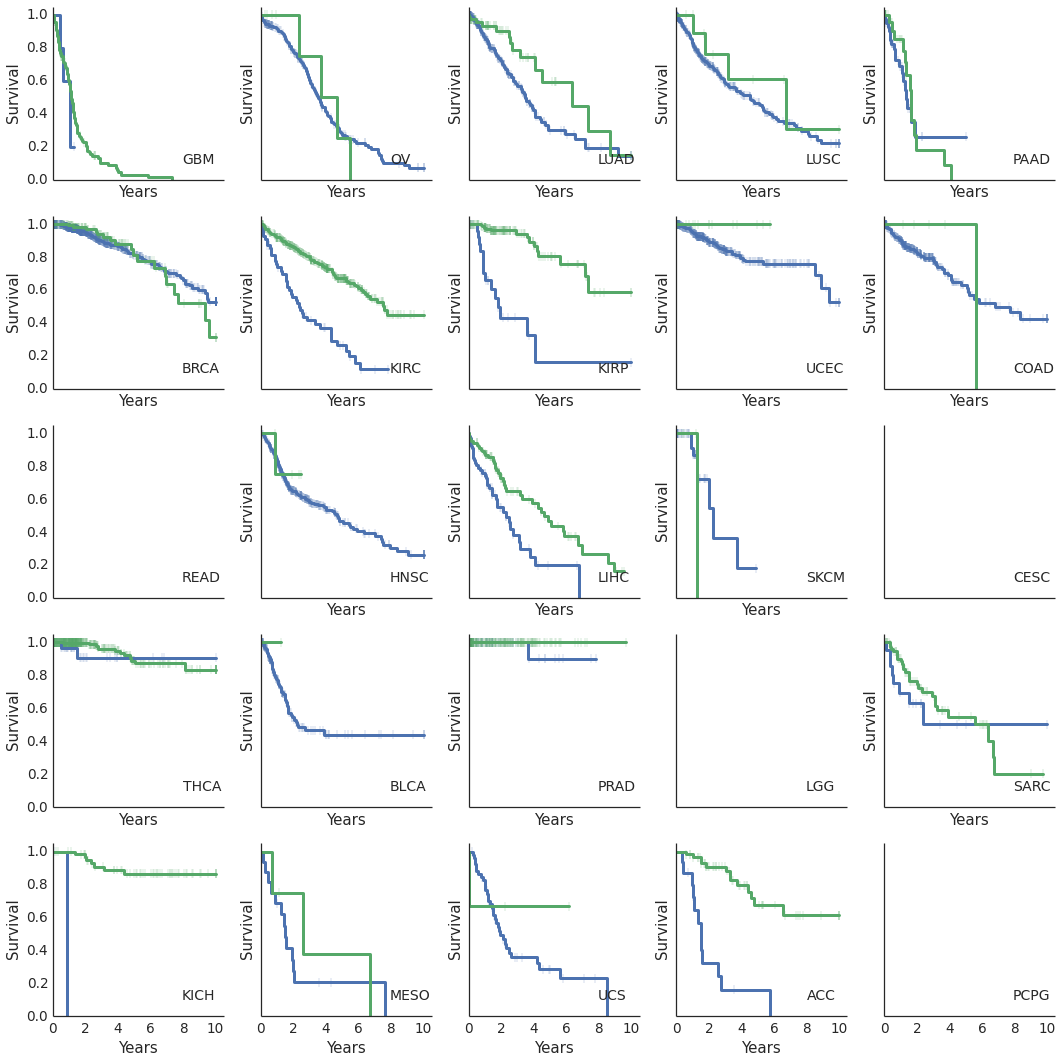

In [23]:
cc = codes.ix[v.index].dropna()
ss = surv_10y.unstack().index
cc = cc[cc.isin(ti(cc.value_counts()  > 30))]
fig, axs = subplots(5,5, figsize=(15,15), sharey=True, sharex=True)
axs = axs.flatten()
for i,c in enumerate(cc.unique()):
    ax = axs[i]
    ax.annotate(c, (8, .1))
    try:
        draw_survival_curve(v.ix[ss].ix[ti(cc==c)].dropna() < .5, surv_10y,
                            ax=ax)
        ax.legend_.set_visible(False)
    except:
        pass
fig.tight_layout()
DX.sns.despine(fig)

RRuntimeError: Error in Surv(days, event) : object 'days' not found


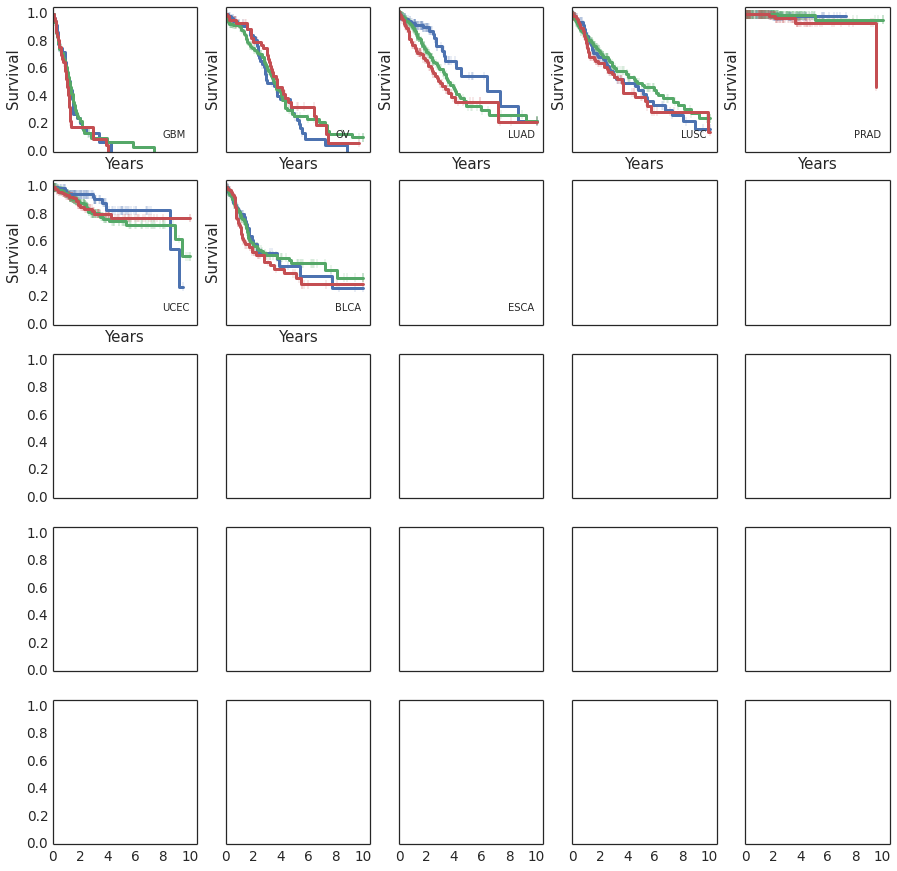

In [230]:
cc = codes.ix[v.index].dropna()
ss = surv_10y.unstack().index
cc = cc[cc.isin(ti(cc.value_counts()  > 30))]
fig, axs = subplots(5,5, figsize=(15,15), sharey=True, sharex=True)
axs = axs.flatten()
for i,c in enumerate(cc.unique()):
    ax = axs[i]
    ax.annotate(c, (8, .1))
    draw_survival_curve(v.ix[ss].ix[ti(cc==c)].dropna(), surv_10y,
                        ax=ax)
    ax.legend_.set_visible(False)
ax.legend_.set_visible(True)
fig.tight_layout()
DX.sns.despine(fig)

In [25]:
ff = DX.dx_meth.frac
ff2 = np.floor(ff * 5)
fm = ff[ff2.isin([0,4])]
fm = ff[(ff - .5).abs() > .15]
#fm = ((ff -.5) / ff.std())
#fm = ff

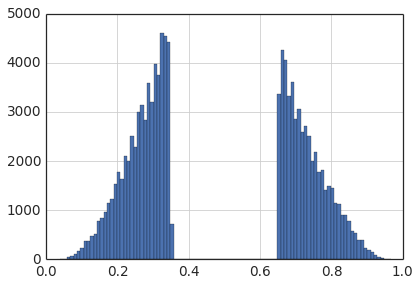

In [26]:
fm.hist(bins=100)

In [27]:
store = pd.HDFStore('/data_ssd/TCGA_methylation_2014_04_16.h5')

In [28]:
%%time
mm = {}
size = {}
for c in store.keys():
    try:
        if c in ['/matched_tn','/codes']:
            continue
        df = store[c].xs('11',1,1).ix[fm.index]
        s = df.shape[1]
        mm[c] = df.mean(1)
        size[c] = s
    except:
        print c
mm = pd.concat(mm, 1)
size = pd.Series(size)
mm = mm.dot(size) / size.sum()

/ACC
/DLBC
/KICH
/LAML
/LGG
/MESO
/UCS
CPU times: user 13.2 s, sys: 22.1 s, total: 35.4 s
Wall time: 1min 13s


In [29]:
%%time
dx = {}
for c in store.keys():
    try:
        if c in ['/matched_tn','/codes']:
            continue
        df = store[c].xs('11',1,1).ix[fm.index]
        dx[c] = (df.sub(mm, axis=0) ** 2).sum(1)
    except:
        print c
dx = pd.concat(dx, 1)
ss = (dx.sum(1) / (sum(size) - 1)) ** .5

/ACC
/DLBC
/KICH
/LAML
/LGG
/MESO
/UCS
CPU times: user 15.7 s, sys: 25 s, total: 40.7 s
Wall time: 1min 15s


In [30]:
mm = mm.ix[fm.index]
ss = ss.ix[fm.index]

In [31]:
%%time
meth_s = {}
for c in store.keys():
    if c == 'matched_tn':
        continue
    df = store[c].ix[fm.index]
    #df = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)
    df = df.sub(mm, axis=0).div(ss, axis=0)
    df = df.ix[fm.index]
    meth_s[c] = df.corrwith(fm)
meth_s = pd.concat(meth_s)
meth_s.index = meth_s.index.droplevel(0)
meth_s = meth_s.groupby(level=[0,1]).first()

CPU times: user 1min, sys: 38 s, total: 1min 38s
Wall time: 2min 1s


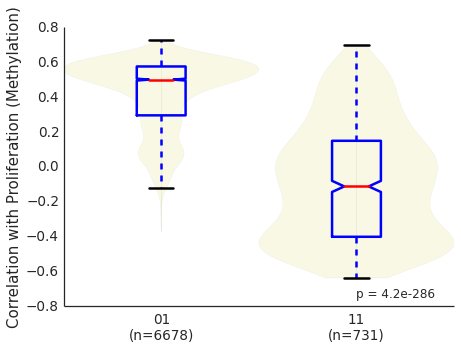

In [32]:
fig, ax = subplots(figsize=(7,5))
violin_plot_series(meth_s, ax=ax, order=['01','11'])
ax.set_ylabel('Correlation with Proliferation (Methylation)')
ax.set_xlabel('')
prettify_ax(ax)

In [33]:
v = meth_s.ix[:, '01'].dropna()
v = v - DX.codes.map(v.groupby(DX.codes).median())
v.name = 'cc'
v = v.dropna()

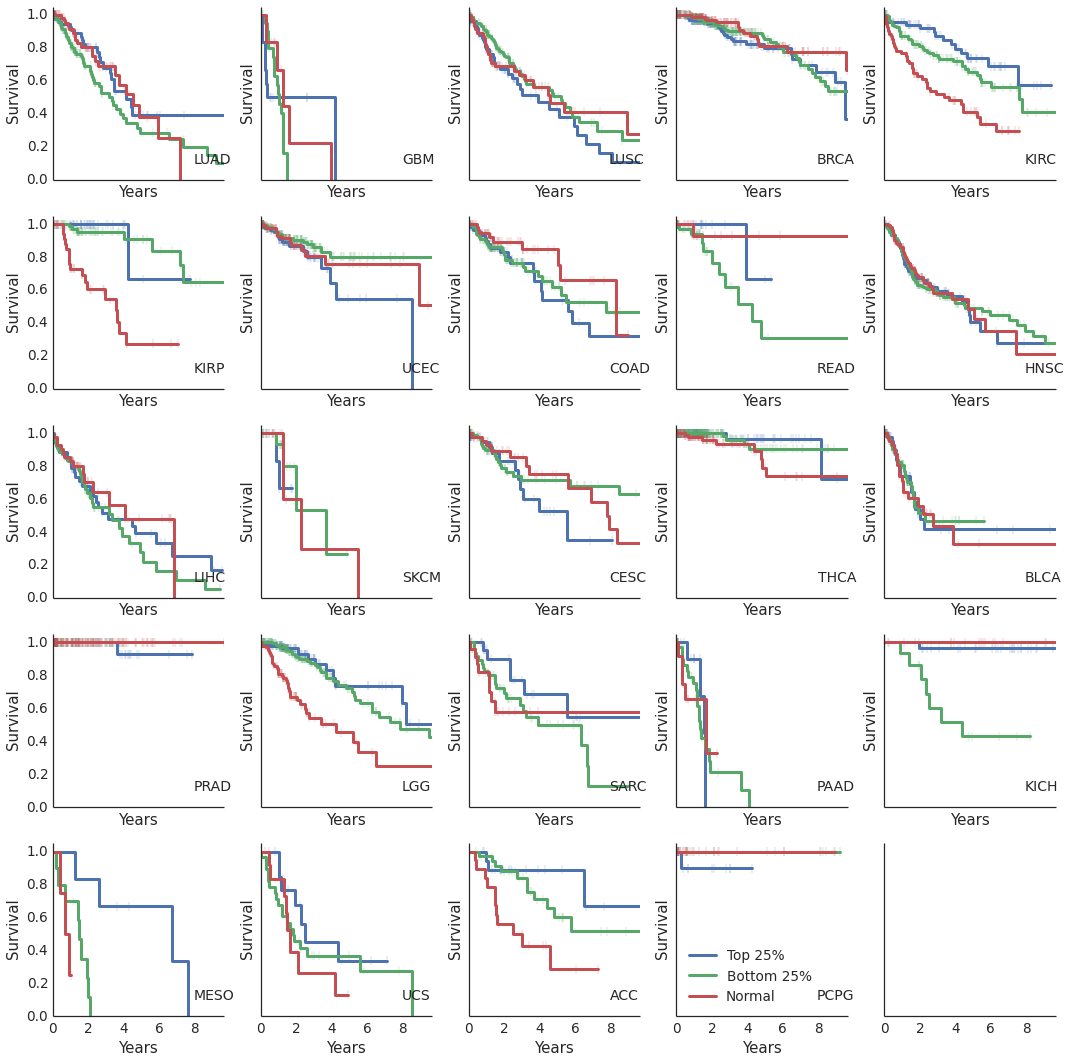

In [34]:
cc = codes.ix[v.index].dropna()
ss = surv_10y.unstack().index
cc = cc[cc.isin(ti(cc.value_counts()  > 30))]
fig, axs = subplots(5,5, figsize=(15,15), sharey=True, sharex=True)
axs = axs.flatten()
for i,c in enumerate(cc.unique()):
    ax = axs[i]
    ax.annotate(c, (8, .1))
    draw_survival_curve(v.ix[ss].ix[ti(cc==c)].dropna(), surv_10y,
                        ax=ax)
    ax.legend_.set_visible(False)
ax.legend_.set_visible(True)
fig.tight_layout()
DX.sns.despine(fig)

In [35]:
pearson_pandas(meth_s.ix[:,'01'], rp.ix[:, '01'].dropna()).ix['rho']

0.80192585193338117

In [36]:
spearman_pandas(meth_s.ix[:,'01'], rp.ix[:, '01'].dropna()).ix['rho']

0.77148919413030626

In [37]:
def detrend(x,y):
    x, y = match_series(x, y)
    reg = linear_regression(x, y)
    adj = (y - reg['intercept']) / reg['slope']
    return adj

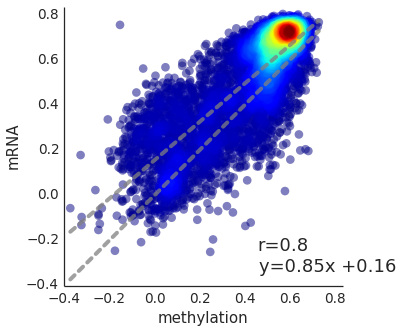

In [38]:
m1 = meth_s.ix[:,'01']
m1.name = 'methylation'
r1 = rp.ix[:, '01'].dropna()
r1.name = 'mRNA'

plot_regression(m1, r1, rad=.03, density=True)

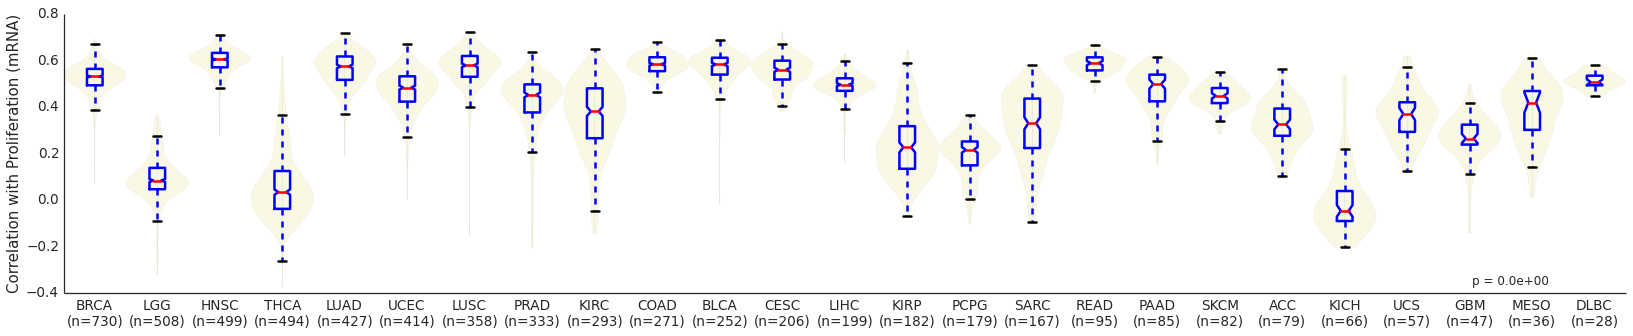

In [39]:
fig, ax = subplots(figsize=(28,5))
violin_plot_pandas(DX.codes, m1, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Correlation with Proliferation (mRNA)')
prettify_ax(ax)

In [40]:
meth_d = detrend(rp.ix[:, '01'].dropna(), meth_s.ix[:, '01'])
rna_d = rp.ix[:, '01']
#meth_d = meth_s[:, '01']
#plot_regression(rna_d, meth_d, rad=.1, density=True)

In [41]:
prog_diff = 2*(meth_d - rna_d).abs()
pts = ti(prog_diff < .5)
len(pts)

5286

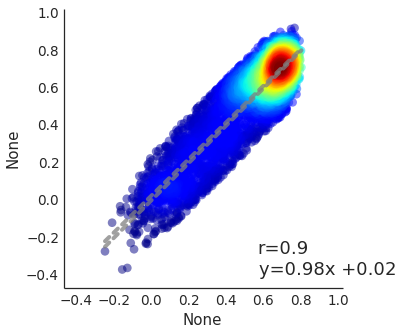

In [42]:
plot_regression(rna_d.ix[pts], meth_d, rad=.1, density=True)

In [43]:
#agg = (meth_d * rna_d) ** .5
agg = (meth_s + rna_s) / 2.
#agg = pd.concat([meth_d, rna_d], axis=1).max(1)

In [44]:
v = meth_s.ix[:, '01']
v.name = 'cc'
get_cox_ph_ms(surv_10y, v, codes.ix[v.index].dropna(), interactions=True)

LR                                              3.32e-24
feature_p                                            NaN
fmla         Surv(days, event) ~ codes + codes:feature\n
hazzard                                              NaN
dtype: object

In [45]:
get_cox_ph_ms(surv_10y, v, codes.ix[v.index].dropna(), interactions=False)

LR                                        2.56e-17
feature_p                                 1.11e-16
fmla         Surv(days, event) ~ feature + codes\n
hazzard                                       18.8
dtype: object

In [47]:
store = pd.HDFStore('/data_ssd/miRNASeq_2015_02_04.h5')

In [48]:
mirna = {}
for c in store.keys():
    if c in ['/matched_tn', '/codes']:
        continue
    mirna[c] = store[c]
mirna = pd.concat(mirna, 1)
mirna.columns = mirna.columns.droplevel(0)

In [49]:
mm = mirna.xs('11',1,1).mean(1)
ss = mirna.xs('11',1,1).std(1)
mirna = mirna.sub(mm, axis=0).div(ss, axis=0)

In [50]:
ff = DX.dx_mir.frac
ff2 = np.floor(ff * 5)
#fm = ff[ff2.isin([0,1,3,4])]
fm = ff

In [51]:
mirna_s = mirna.ix[fm.index].corrwith(fm)
mirna_s = mirna_s.groupby(level=[0,1]).first()

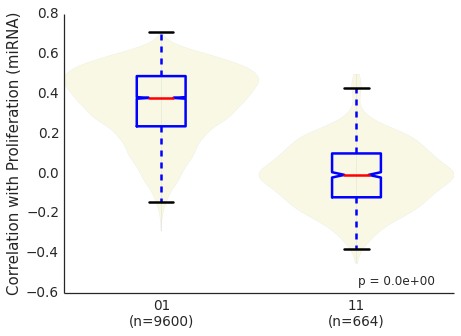

In [52]:
fig, ax = subplots(figsize=(7,5))
violin_plot_series(mirna_s, ax=ax, order=['01','11'])
ax.set_ylabel('Correlation with Proliferation (miRNA)')
ax.set_xlabel('')
prettify_ax(ax)

In [53]:
v = mirna_s.ix[:, '01'].dropna()
v = v - DX.codes.map(v.groupby(DX.codes).median())
v.name = 'cc'
v = v.dropna()

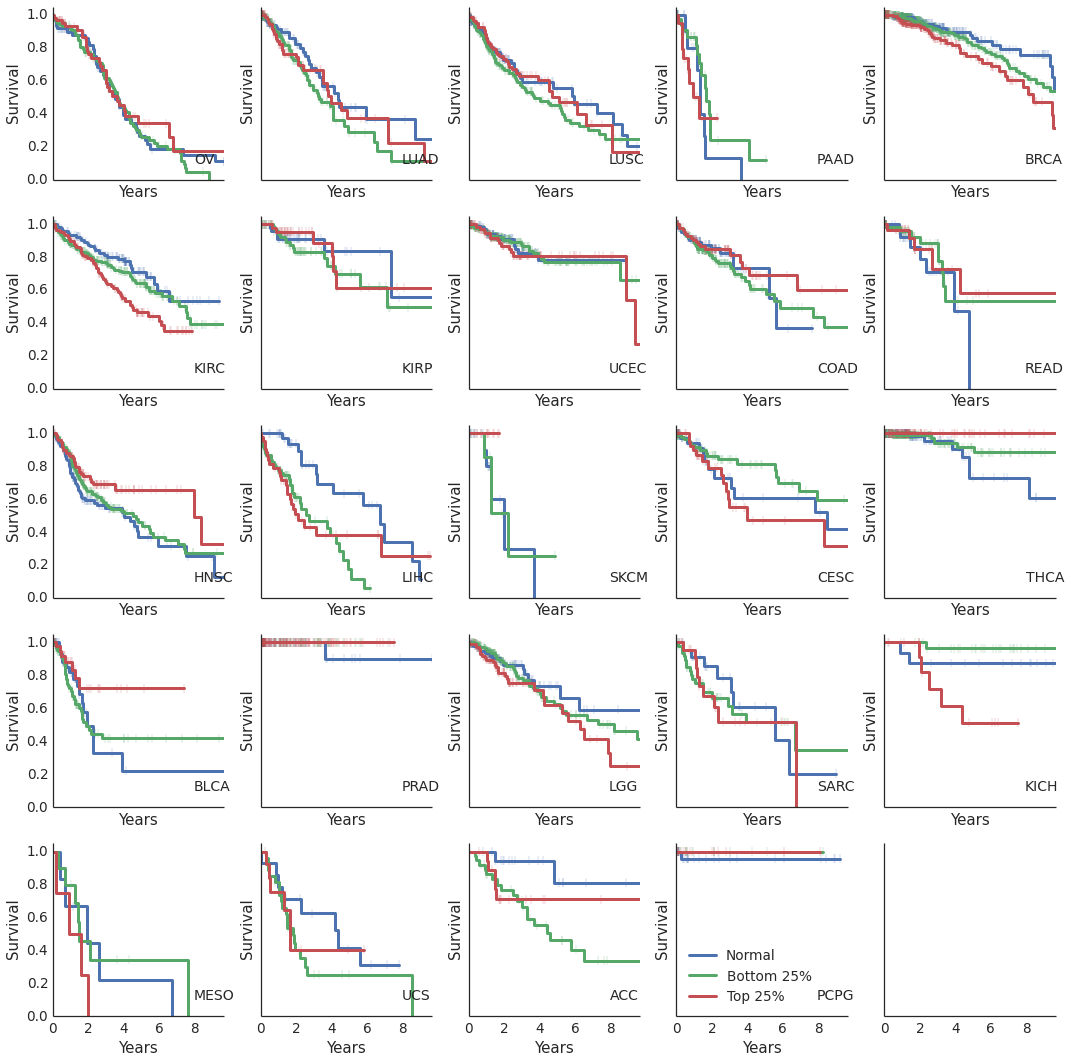

In [54]:
cc = codes.ix[v.index].dropna()
ss = surv_10y.unstack().index
cc = cc[cc.isin(ti(cc.value_counts()  > 30))]
fig, axs = subplots(5,5, figsize=(15,15), sharey=True, sharex=True)
axs = axs.flatten()
for i,c in enumerate(cc.unique()):
    ax = axs[i]
    ax.annotate(c, (8, .1))
    draw_survival_curve(v.ix[ss].ix[ti(cc==c)].dropna(), surv_10y,
                        ax=ax)
    ax.legend_.set_visible(False)
ax.legend_.set_visible(True)
fig.tight_layout()
DX.sns.despine(fig)

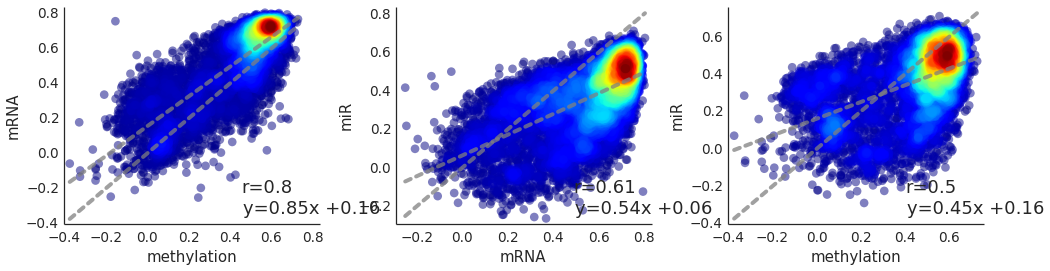

In [55]:
m1 = meth_s.ix[:,'01']
m1.name = 'methylation'
r1 = rp.ix[:, '01'].dropna()
r1.name = 'mRNA'
mir1 = mirna_s.ix[:, '01']
mir1.name = 'miR'

fig, axs = subplots(1,3, figsize=(14,4))
plot_regression(m1, r1, rad=.03, density=True, ax=axs[0])
plot_regression(r1, mir1, rad=.03, density=True, ax=axs[1])
plot_regression(m1, mir1, rad=.03, density=True, ax=axs[2])
fig.tight_layout()

In [56]:
agg2 = ((meth_d + rna_d + mirna_d) / (3.)).dropna()

NameError: name 'mirna_d' is not defined

In [ ]:
fig, ax = subplots(figsize=(20,5))
violin_plot_pandas(DX.codes, agg2, ax=ax)

In [ ]:
v = agg2
v.name = 'cc'
get_cox_ph_ms(surv_10y, v, codes.ix[v.index].dropna(), interactions=False)

In [ ]:
agg2.name = 'a2'

In [ ]:
s